# Global 2000: The World's Largest Public Companies (2017-2021)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Forbes Top 2000(2017-2021).xlsx')
df = pd.read_excel(filepath)

# Head and Tail

In [4]:
df

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017
...,...,...,...,...,...,...,...,...
10095,1976.0,JTEKT,Japan,$13.1 B,$-34.9 M,$12 B,$3.5 B,2021
10096,1976.0,Insurance Australia Group,Australia,$5.4 B,$-212 M,$25 B,$9.3 B,2021
10097,1979.0,Sumec Corporation,China,$13 B,$79.2 M,$7.1 B,$1.3 B,2021
10098,1979.0,Gold Fields,South Africa,$3.9 B,$718.1 M,$7.5 B,$8.9 B,2021


In [5]:
df.shape

(10100, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          9981 non-null   float64
 1   Name          10100 non-null  object 
 2   Country       10098 non-null  object 
 3   Sales         10093 non-null  object 
 4   Profit        10097 non-null  object 
 5   Assets        10086 non-null  object 
 6   Market Value  10092 non-null  object 
 7   Year          10100 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 631.4+ KB


In [7]:
df.rename(
    columns={'Market Value': 'MarketValue'}, inplace=True
)

df.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017


# 2017 Data Exploration

In [8]:
df_17 = df[df['Year'] == 2017]
df_17.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.074,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.231,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.938,1943.443,274.385,2017


In [9]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         2000 non-null   float64
 1   Name         2000 non-null   object 
 2   Country      2000 non-null   object 
 3   Sales        1998 non-null   object 
 4   Profit       2000 non-null   object 
 5   Assets       1999 non-null   object 
 6   MarketValue  1999 non-null   object 
 7   Year         2000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 140.6+ KB


In [10]:
df_17.shape

(2000, 8)

In [11]:
df_17[['Sales', 'Profit', 'Assets', 'MarketValue']] = df_17[['Sales', 'Profit', 'Assets', 'MarketValue']].astype(np.float64)   # change data type
df_17['Rank'] = df_17['Rank'].astype('category')

In [12]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Rank         2000 non-null   category
 1   Name         2000 non-null   object  
 2   Country      2000 non-null   object  
 3   Sales        1998 non-null   float64 
 4   Profit       2000 non-null   float64 
 5   Assets       1999 non-null   float64 
 6   MarketValue  1999 non-null   float64 
 7   Year         2000 non-null   int64   
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 209.1+ KB


In [13]:
df_17.describe(include='object')

,Name,Country
count,2000,2000
unique,1999,61
top,Merck,United States
freq,2,564


In [14]:
df_17['Name'].value_counts()

Merck                     2
ICBC                      1
Chugoku Electric Power    1
Agilent Technologies      1
JetBlue Airways           1
                         ..
Fortescue Metals Group    1
Commerzbank               1
DaVita                    1
West Japan Railway        1
Tech Mahindra             1
Name: Name, Length: 1999, dtype: int64

In [15]:
df_17['Country'].value_counts()

United States     564
Japan             229
China             200
United Kingdom     91
South Korea        64
                 ... 
Jordan              1
Oman                1
Mongolia            1
Czech Republic      1
Puerto Rico         1
Name: Country, Length: 61, dtype: int64

In [16]:
df_17['Rank'].value_counts()

1.0       1
1330.0    1
1343.0    1
1342.0    1
1341.0    1
         ..
662.0     1
661.0     1
660.0     1
659.0     1
2000.0    1
Name: Rank, Length: 2000, dtype: int64

In [17]:
df_17.describe(include='float64')

,Sales,Profit,Assets,MarketValue
count,1998.000000,2000.000000,1999.000000,1999.000000
mean,17.680185,1.241552,84.569579,24.423543
std,29.329947,2.918115,261.044216,44.772378
min,0.001000,-13.042100,0.001000,0.072000
25%,4.029250,0.317975,10.860500,6.639500
50%,8.802500,0.612300,22.884000,11.944000
75%,17.449500,1.279825,52.376000,24.362500
max,485.252000,45.217000,3473.238000,752.039000


# Exploratory Data Analysis

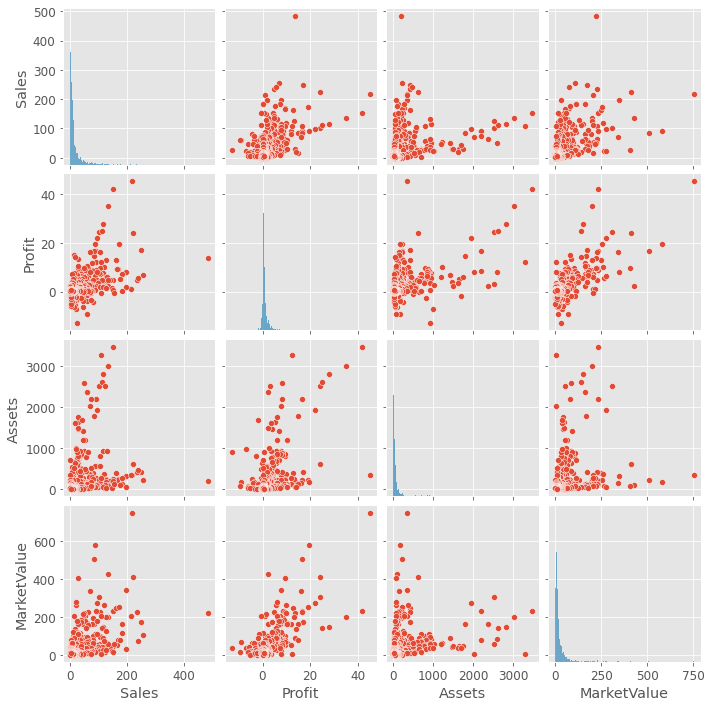

In [18]:
sns.pairplot(df_17[['Sales', 'Profit', 'Assets', 'MarketValue']])                # data is right skewed

# Missing Data Exploration

In [19]:
df_17.isna().sum()

Rank           0
Name           0
Country        0
Sales          2
Profit         0
Assets         1
MarketValue    1
Year           0
dtype: int64

In [20]:
df_17[df_17['Sales'].isna()]                    

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
1796,1797.0,Grupo Zuliano,Venezuela,NaN,0.9989,1.521,0.072,2017
1913,1914.0,Technipfmc,United Kingdom,NaN,0.0000,0.001,15.631,2017


In [21]:
df_17[df_17['Assets'].isna()]    

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
1726,1727.0,Bank of Greece,Greece,1.935,1.2084,NaN,0.24,2017


In [22]:
df_17[df_17['MarketValue'].isna()]   

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
1273,1274.0,Banca MPS,Italy,5.887,-3.5853,161.828,NaN,2017


In [23]:
df_17_drop = df_17.dropna() 
df_17_drop.head()

,Rank,Name,Country,Sales,Profit,Assets,MarketValue,Year
0,1.0,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2.0,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3.0,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
3,4.0,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
4,5.0,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


In [24]:
df_17_drop.isna().sum()

Rank           0
Name           0
Country        0
Sales          0
Profit         0
Assets         0
MarketValue    0
Year           0
dtype: int64

# Grouping and Aggregation (2017)

In [25]:
df_17_drop_gpd = df_17_drop.groupby('Country').agg([np.min, np.mean, np.max, np.sum])
df_17_drop_gpd

Sales                                 Profit            \
                       amin       mean     amax        sum    amin      mean   
Country                                                                        
Argentina             0.360   6.098667   14.219     18.296 -1.9110 -0.461333   
Australia             0.549  11.082897   50.033    432.233 -1.4979  1.237331   
Austria               3.093  10.303750   21.306     82.430 -0.4458  0.387875   
Bahrain               1.608   1.646500    1.685      3.293  0.1830  0.363050   
Belgium               0.393  12.933222   45.558    116.399  0.0300  0.756222   
...                     ...        ...      ...        ...     ...       ...   
United Arab Emirates  1.352   3.917571   14.255     54.846 -5.1821  0.592321   
United Kingdom        0.644  21.029667  183.834   1892.670 -9.2638  0.719003   
United States         0.031  20.396835  485.252  11503.815 -6.1770  1.640453   
Venezuela             0.370   3.660500    6.951      7.321  2.0042  2.273150   
Vietnam               2.087   2.537000    3.293     10.148  0.2754  0.320325   

                                         Assets                        \
                         amax       sum    amin        mean      amax   
Country                                                                 
Argentina              0.4073   -1.3840   0.811   14.243667    26.612   
Australia              7.0652   48.2559   3.840   92.461923   703.622   
Austria                1.3804    3.1030  11.518   62.299500   220.843   
Bahrain                0.5431    0.7261  30.141   30.731500    31.322   
Belgium                2.6847    6.8060   4.442  104.175556   290.267   
...                       ...       ...     ...         ...       ...   
United Arab Emirates   2.2927    8.2925   5.013   41.407214   121.976   
United Kingdom         6.2715   64.7103   2.771  132.768400  2374.986   
United States         45.2170  925.2156   0.292   71.467413  3287.968   
Venezuela              2.5421    4.5463   2.575   75.617000   148.659   
Vietnam                0.3964    1.2813   1.290   30.440250    44.207   

                                MarketValue                                 \
                            sum        amin       mean     amax        sum   
Country                                                                      
Argentina                42.731       5.134  11.769000   20.230     35.307   
Australia              3606.015       3.491  23.192051  109.902    904.490   
Austria                 498.396       2.374   7.114875   13.617     56.919   
Bahrain                  61.463       1.088   3.513500    5.939      7.027   
Belgium                 937.580       0.373  33.344444  213.102    300.100   
...                         ...         ...        ...      ...        ...   
United Arab Emirates    579.701       0.941  10.726071   42.739    150.165   
United Kingdom        11949.156       1.601  23.422467  162.638   2108.022   
United States         40307.621       0.681  38.202078  752.039  21545.972   
Venezuela               151.234       2.512   2.618500    2.725      5.237   
Vietnam                 121.761       2.580   5.128750    9.134     20.515   

                      Year                         
                      amin    mean  amax      sum  
Country                                            
Argentina             2017  2017.0  2017     6051  
Australia             2017  2017.0  2017    78663  
Austria               2017  2017.0  2017    16136  
Bahrain               2017  2017.0  2017     4034  
Belgium               2017  2017.0  2017    18153  
...                    ...     ...   ...      ...  
United Arab Emirates  2017  2017.0  2017    28238  
United Kingdom        2017  2017.0  2017   181530  
United States         2017  2017.0  2017  1137588  
Venezuela             2017  2017.0  2017     4034  
Vietnam               2017  2017.0  2017     8068  

[61 rows x 20 columns]